# Data Importing

Before doing any modelling, the data must be read in from .csv files, and the resulting DataFrame should be analyzed and understood.

In [1]:
import pandas as pd

# define a function for code reproducability later one (more seasons, inclusion of more pitchers, etc.)
def read_pitch_data(path):
    '''
    Reads in csv files for a given absolute or relative path.
    '''
    try:
        df = pd.read_csv(path)
        return df
    except FileNotFoundError as e:
        print(f'{e} \nRerun with an existing filename.')

In [2]:
# use function to read in csv file
train = read_pitch_data('pitchclassificationtrain.csv')

In [3]:
# and view first few rows 
train.head()

,pitchid,pitcherid,yearid,height,initspeed,breakx,breakz,initposx,initposz,extension,spinrate,type
0,1,5,1,72,83.774424,-1.293106,4.451670,-1.330641,6.065956,6.317961,1386.459243,3
1,2,5,1,72,89.642714,-6.550556,7.993455,-1.556463,5.719125,6.119526,1963.264977,9
2,3,4,1,72,91.750648,-6.985574,8.991264,-2.055134,5.780312,6.201200,2360.758263,9
3,4,5,1,72,83.189766,-2.549204,4.844714,-1.001020,6.240138,6.074156,858.997788,7
4,5,2,1,80,92.698738,-5.216516,7.267769,-2.097643,5.776138,6.212281,2060.155099,9


In [4]:
# and for the test set
test = read_pitch_data('pitchclassificationtest.csv')

In [5]:
test.head()

,pitchid,pitcherid,yearid,height,initspeed,breakx,breakz,initposx,initposz,extension,spinrate
0,10648,3,3,77,84.456228,4.153646,9.338819,4.056353,6.486289,6.166051,2257.153203
1,10649,1,3,76,88.219799,-7.082679,3.091779,-2.218359,5.997977,6.527265,2200.836684
2,10650,1,3,76,86.351469,-7.998646,3.875420,-2.346287,5.919790,6.350896,2227.855798
3,10651,4,3,72,93.309879,-2.800042,8.270781,-1.850865,5.886583,6.044787,2188.735352
4,10652,3,3,77,85.284153,9.411612,7.600999,4.218555,6.536227,6.219090,2102.098895


The data looks like it was read in correctly! Occasionally, there are parsing issues that arise if given a tab-separated file instead of a comma-separated one. In this case, there were no significant issues. One thing that should be adjusted, however, is the index row. By default, `pd.read_csv()` creates an additional column that is not a part of the DataFrame, but is an added index. In some cases, this is quite useful, but here there is already an existing `pitchid` column which suffices. Therefore, the index will be replaced below for both tables.

In [6]:
train.set_index('pitchid',inplace = True) # `inplace` redeclares changed df to original `train` variable
train.head() # prints first 5 rows

,pitcherid,yearid,height,initspeed,breakx,breakz,initposx,initposz,extension,spinrate,type
pitchid,,,,,,,,,,,
1,5,1,72,83.774424,-1.293106,4.451670,-1.330641,6.065956,6.317961,1386.459243,3
2,5,1,72,89.642714,-6.550556,7.993455,-1.556463,5.719125,6.119526,1963.264977,9
3,4,1,72,91.750648,-6.985574,8.991264,-2.055134,5.780312,6.201200,2360.758263,9
4,5,1,72,83.189766,-2.549204,4.844714,-1.001020,6.240138,6.074156,858.997788,7
5,2,1,80,92.698738,-5.216516,7.267769,-2.097643,5.776138,6.212281,2060.155099,9


In [7]:
test.set_index('pitchid',inplace = True) # `inplace` redeclares changed df to original `test` variable
test.head() # prints first 5 rows

,pitcherid,yearid,height,initspeed,breakx,breakz,initposx,initposz,extension,spinrate
pitchid,,,,,,,,,,
10648,3,3,77,84.456228,4.153646,9.338819,4.056353,6.486289,6.166051,2257.153203
10649,1,3,76,88.219799,-7.082679,3.091779,-2.218359,5.997977,6.527265,2200.836684
10650,1,3,76,86.351469,-7.998646,3.875420,-2.346287,5.919790,6.350896,2227.855798
10651,4,3,72,93.309879,-2.800042,8.270781,-1.850865,5.886583,6.044787,2188.735352
10652,3,3,77,85.284153,9.411612,7.600999,4.218555,6.536227,6.219090,2102.098895


Now the `pitchid` replaces the dummy index as the new index. 

It is important to note that now, the train table index is 1-indexed compared to before where it was 0-indexed. 

# Exploratory Data Analysis (data types, null check, duplicate check)

### Data Type Analysis

Now, data interpretation begins. Numerous exploratory questions are important to understand, such as relevant data types, potential duplicated entries, and potential missing/invalid values. This will be explored using the training data, but the testing data is identical sans the label (pitch type).

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10647 entries, 1 to 10647
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pitcherid  10647 non-null  int64  
 1   yearid     10647 non-null  int64  
 2   height     10647 non-null  int64  
 3   initspeed  10647 non-null  float64
 4   breakx     10647 non-null  float64
 5   breakz     10647 non-null  float64
 6   initposx   10647 non-null  float64
 7   initposz   10647 non-null  float64
 8   extension  10647 non-null  float64
 9   spinrate   10647 non-null  float64
 10  type       10647 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 998.2 KB


This `df.info()` function is extremely useful when reading from an unknown data source. It displays the data type of each column, as well as the amount of non-null/NaN values that exist. In certain cases, this will be a large amount, which necessitates further extrapolation. With this pitch data, the data seems to be all continuous (numerical) and perfectly clean with no null values.

In [9]:
train.select_dtypes(include = 'object').head() # includes strings, but not numerical values...

""
pitchid
1
2
3
4
5


In [10]:
train.select_dtypes(include = 'number').head() # numerical data (floats, doubles, ints...)

,pitcherid,yearid,height,initspeed,breakx,breakz,initposx,initposz,extension,spinrate,type
pitchid,,,,,,,,,,,
1,5,1,72,83.774424,-1.293106,4.451670,-1.330641,6.065956,6.317961,1386.459243,3
2,5,1,72,89.642714,-6.550556,7.993455,-1.556463,5.719125,6.119526,1963.264977,9
3,4,1,72,91.750648,-6.985574,8.991264,-2.055134,5.780312,6.201200,2360.758263,9
4,5,1,72,83.189766,-2.549204,4.844714,-1.001020,6.240138,6.074156,858.997788,7
5,2,1,80,92.698738,-5.216516,7.267769,-2.097643,5.776138,6.212281,2060.155099,9


Now this is confirmed - all the data is numerical. This bodes well for the projection.

### Duplicate Check

Next is to check for duplicatated entries. Again, this is proved in the above `.info()` (10647 entries = 10647 non nulls), but there is additional checks that can be done for safety.

In [11]:
def check_dupes(df):
    if (df.duplicated().sum() == 0): # duplicated () checks each row for dupe
        print("No row is a duplicate entry.")
    else:
        print("There is a duplicate entry.")

In [12]:
check_dupes(train)

No row is a duplicate entry.


### Null Check

Now, a final null check...

In [13]:
def check_nulls(df):
    if(train.isna().sum().any() == False):
        print("No row contains a null or NaN value.")
    else:
        print("There is a null or NaN value in this table.")

In [14]:
check_nulls(train)

No row contains a null or NaN value.


# Exploratory Analysis -  Value Interpretation

### Feature Domains

In addition to these standard data quality checks, it is imperative to understand all the possible values that features can take on. Firstly, the label, or the variable that is ultimately to predict. In this case, this is the pitch type.

In [15]:
print(train.nunique())
print(test.nunique())

pitcherid        5
yearid           2
height           4
initspeed    10647
breakx       10647
breakz       10647
initposx     10647
initposz     10647
extension    10647
spinrate     10647
type             7
dtype: int64
pitcherid        6
yearid           1
height           5
initspeed    12354
breakx       12354
breakz       12354
initposx     12354
initposz     12354
extension    12354
spinrate     12354
dtype: int64


Some conclusions can be made from exploring the domains of each feature. Firstly, each recorded pitch for both training and testing set is unique. This corresponds to the duplicate check above.

But perhaps the most important thing to note is that 5 pitchers are samples for the training set, this jumps to 6 for the test set. An additional pitcher is included.

### Pitch Analysis

In [16]:
t_by_pitcher = test.groupby(['pitcherid']) # creates groupby object that needs aggregation function, much like in SQL
a = t_by_pitcher.count().iloc[:,0] # count agg function and has all identical columns
a.name = "Test Pitches" # rename
a

pitcherid
1    2551
2    3039
3    1961
4    2488
5     975
6    1340
Name: Test Pitches, dtype: int64

In [17]:
tr_by_pitcher = train.groupby(['pitcherid'])
b = tr_by_pitcher.count().iloc[:,0]
b.name = 'Train Pitches'
b

pitcherid
1    1049
2    2137
3      12
4    1840
5    5609
Name: Train Pitches, dtype: int64

These counts drastically shift between the training and testing set. Despite pitcher 3 only having a handful of training pitches recorded, there are many to predict. Similarly, pitcher 6's lack of any recorded training pitches is striking. A double bar plot illustrates these differences further.

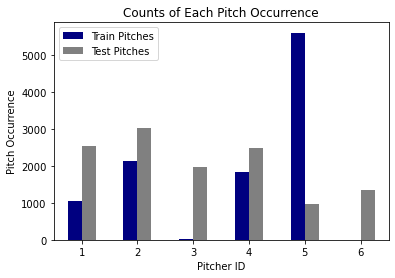

In [18]:
import matplotlib.pyplot as plt

temp = pd.DataFrame(data = [b,a]).T # set up data for graphing
temp.loc[6,'Train Pitches'] = 0


temp.plot(kind='bar',color = ['Navy','Grey'])
plt.title('Counts of Each Pitch Occurrence')
plt.xlabel('Pitcher ID')
plt.ylabel('Pitch Occurrence')
plt.legend()
plt.xticks(rotation = 0)
plt.show()

Most importantly, the number of pitches from each pitcher differs greatly from training set to test set and this follows no consistent pattern. In the training set, pitches from pitcher 5 sky over the others (including effectively none from pitchers 3 and 6), while the testing set has a balanced sample.

Next, grouping the training set by both `pitcherid` and `type` reveals perhaps the most important insight. Key features that are amongst the most useful for pitch prediction (i.e. `spinrate`, `break`) differ greatly from one pitcher to the next. Let's take a look at this...



In [24]:
grouped_by_pitcher_and_pitchtype = train.groupby(['pitcherid','type']).mean()
grouped_by_pitcher_and_pitchtype

yearid  height  initspeed    breakx    breakz  initposx  \
pitcherid type                                                              
1         2     1.622568    76.0  77.184649  5.828949 -6.465751 -1.853722   
          4     1.623529    76.0  81.256485 -6.687739  0.901235 -1.837891   
          9     1.622328    76.0  88.111246 -8.489336  3.433453 -2.061642   
          10    1.620690    76.0  89.379503 -5.991735  7.133704 -1.885880   
2         2     1.459406    80.0  79.725846  5.550297 -6.765411 -2.183653   
          4     1.459144    80.0  87.640018 -5.492145  3.155552 -2.352389   
          9     1.459283    80.0  93.986534 -6.268013  7.541033 -2.264713   
          10    1.459921    80.0  93.989805 -1.666313  8.985849 -2.268045   
3         3     2.000000    77.0  84.724239 -0.095325  4.387893  3.885417   
          9     2.000000    77.0  86.872509  9.506199  4.935019  4.144652   
          10    2.000000    77.0  87.669556  4.792491  8.583975  4.068610   
4         2     1.372294    72.0  81.272190  4.391457 -2.727062 -1.920160   
          4     1.369792    72.0  87.024961 -7.692077  3.305207 -2.150858   
          8     1.371622    72.0  88.949812  1.945656  4.423136 -1.989772   
          9     1.372937    72.0  93.421712 -7.346243  7.695445 -2.076269   
          10    1.371642    72.0  93.364377 -4.694467  9.769430 -1.967950   
5         2     1.536735    72.0  72.034438  3.956681 -9.054074 -1.235375   
          3     1.536946    72.0  82.437137  1.070132 -0.076762 -1.434931   
          4     1.536741    72.0  82.315553 -4.573954  4.659737 -1.331371   
          7     1.537181    72.0  84.628220 -2.907276  2.479132 -1.022949   
          8     1.539130    72.0  88.812978 -0.142941  5.267946 -1.476262   
          9     1.537267    72.0  90.447346 -7.095955  7.429345 -1.568249   
          10    1.537121    72.0  90.927583 -3.099751  9.709911 -1.166873   

                initposz  extension     spinrate  
pitcherid type                                    
1         2     6.397049   6.183043  2951.308056  
          4     6.413236   6.198219  1432.335643  
          9     6.275065   6.186283  2206.983258  
          10    6.405298   6.193901  2232.939575  
2         2     5.860359   6.199286  2574.144562  
          4     5.743424   6.185267  1619.409759  
          9     5.758445   6.213583  2208.271079  
          10    5.855733   6.196070  2241.332678  
3         3     6.661987   6.212182  2044.592208  
          9     6.437153   6.217752  2041.950585  
          10    6.510086   6.136314  2098.654237  
4         2     5.849473   6.195923  2624.055775  
          4     5.694001   6.183192  1430.256863  
          8     5.845591   6.210327  2490.009249  
          9     5.859633   6.191877  2309.789277  
          10    5.922524   6.196149  2336.792865  
5         2     5.861058   6.189578  2167.256966  
          3     5.745504   6.207090  1865.415525  
          4     5.807242   6.203401  1211.610398  
          7     5.992991   6.205710   988.921064  
          8     5.751021   6.195072  2068.382531  
          9     5.781823   6.208067  1927.527936  
          10    5.955988   6.193942  1981.326404

Only two pitch types are present in each pitcher's repertoire: pitch 9 and pitch 10. Vital pitch figures are gathered and plotted below. 

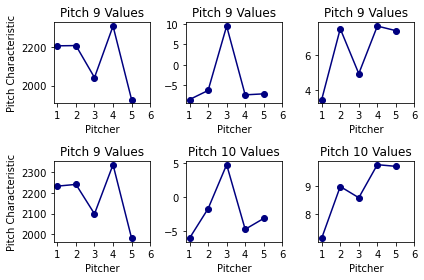

In [41]:
pitch_nine_sr= []
pitch_nine_breakx= []
pitch_nine_breakz= []

pitch_ten_sr= []
pitch_ten_breakx= []
pitch_ten_breakz = []

# iteratively gathering values for pitcher 1 - 5 
for i in range(1,6):
    pitch_nine_sr.append(grouped_by_pitcher_and_pitchtype.loc[(i,9),'spinrate'])
    pitch_nine_breakx.append(grouped_by_pitcher_and_pitchtype.loc[(i,9),'breakx'])
    pitch_nine_breakz.append(grouped_by_pitcher_and_pitchtype.loc[(i,9),'breakz'])
    
    pitch_ten_sr.append(grouped_by_pitcher_and_pitchtype.loc[(i,10),'spinrate'])
    pitch_ten_breakx.append(grouped_by_pitcher_and_pitchtype.loc[(i,10),'breakx'])
    pitch_ten_breakz.append(grouped_by_pitcher_and_pitchtype.loc[(i,10),'breakz'])
    


arrs = [pitch_nine_sr,pitch_nine_breakx,pitch_nine_breakz,pitch_ten_sr,pitch_ten_breakx, pitch_ten_breakz]

plt.figure()
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.plot(arrs[i-1],marker = 'o',color = 'navy')
    if(i <= 4):
        plt.title("Pitch 9 Values")
    else:
        plt.title("Pitch 10 Values")
    plt.xticks(ticks = range(0,6), labels = range(1,7))
    if(i == 4 or i == 1):
        plt.ylabel('Pitch Characteristic')
    plt.xlabel('Pitcher')

plt.tight_layout()
plt.show()

This poses a problem to the ultimate goal of pitch prediction: if key values vary greatly for the same pitch by different pitchers, then it becomes very difficult to predict. 

Moreover, there seems to be a common outlier. Pitcher 3 pitch values are drastically different than the others especially for the `break` features. Upon further review, there is a key insight!

In [ ]:
grouped_by_pitcher_and_pitchtype[]

Since negative in this dataset represents towards the 3rd base side of the rubber, it can be gathered that since pitcher 3's initposx is positive, then he is a righty. 
# MAYBE ADJUST

Even though they are categorized as the same pitch, there are signficant differences in pitch movement and spin. For example, the most prominent pitch type, pitch 2, has an incredible variation.

The key differences lie 

RIGHTY LEFTY GRAPH - MAIN METRICS SUCH AS BREAK DIFFERS SIGNIFICANTLY PER WHAT HANDEDNESS

NameError: name 'pitch_ten_breakx' is not defined

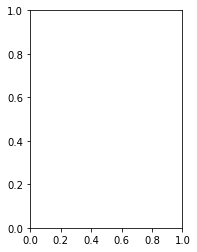

In [22]:
plt.subplot(1, 2, 1)
plt.plot(pitch_ten_breakx)

plt.subplot(1, 2, 2)
plt.plot(pitch_two_spinrate)

np.where( niiit x < 0 , 1, 0)

In [ ]:
# pitches_by_type = train.groupby('type').count().iloc[:,0] # how many of each pitches? 
# pitches_by_type

In [ ]:
aa

DESCRIBE AND LOGIC BEHIND GETTING RID OF INSIGNIFICANT FACTORS

In [ ]:
import numpy as np

t_by_pitcher['extension'].describe(include = np.number)

In [ ]:
t_by_pitcher[['initposx','initposz']].describe()

### Preventing Multicolinearity

In classification or regression problems, it is important to prevent colinearity.

Colinearity can be seen as the propensity to which two independent, predictor variables have a linear relationship each other. When this occurs, it is impossible to measure what is affecting the dependent variable, and leads to an increased p-value for each coefficient. This signifies decreased statistical significance of the findings.

There are many ways to allieviate this, but perhaps the most simple, is to drop one of a colinear pair of variables. This should be done carefully and key features should be preserved. To judge for colinearity, a view of the correlation pairs of each feature are displayed below.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = test.corr()
plt.figure(figsize = (7,7))
sns.heatmap(corr.round(2), vmax = 1, vmin = -1, center = 0, annot =True, cmap = 'coolwarm')
plt.show()

# Model Selection

Because of differing body measures and subsequent motion differences, a new model is to be trained for each pitcher. 

The logic for this decision is as follows:
- Most importantly, this is a valid approach due to the fact that the identities are the same in both datasets.
- Features such as break and spinrate for pitches of the same type can be drastically different for each pitcher.
- This procedure solves the righty-lefty issue.
- Training 5 models ensures standardized biometric dependent features such as initial release point.

RIGHTY LEFTY

# Modeling

Finally, modeling can begin. The data will be split into the feature vector X (for each feature x, $X = x_1, x_2,...x_n$) and the label vector, $y$.

In [ ]:
y = train['type']

In [ ]:
X = train.drop(['type'], axis=1, inplace=False)

Since this data is already split into training and testing sets, there is no need to split it again for that purpose. However, there is a benefit to doing this for another reason: the validation set. 

The validation set provides an evaluation of the models fit to the data, and allows for hyperparameter tuning before finalization. This is fundamentally analagous to the test set, but is a subset of the training set. It is of the utmost importance to prevent the model from 'seeing' the test set, until final model scoring. 

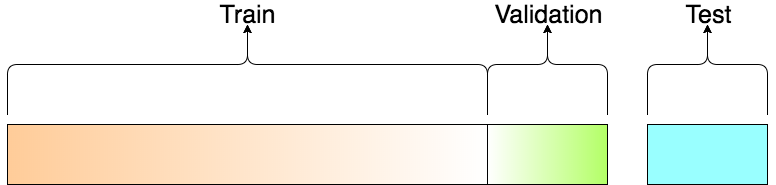

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val \
    = train_test_split(X, y, test_size=0.2, random_state=1) # random state for code reproducibility

print(X_train.shape) # 10647*.8 = 8517 
print(X_val.shape) # 10647*.2 = 2130

kNN or k-Nearest Neighbors is a non-linear model type "for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to." [source](https://learn.g2.com/k-nearest-neighbor)

This includes two types of models: kNN classifier or kNN regressor. The former categorizes a 'best guess' based on the a consensus of the k nearest points, while the latter predicts a continuous variable. For example, a kNN classifier might predict a pitch of being type 10, while a regressor might predict a score of 9.42 for the same pitch.

In this case, a classifier is clearly the better choice due to the numerical, yet categorical label of `type`. 

One important preliminary step of kNN models is to scale the data. Because these models depend on Euclidean distance, scaling the data prevents that which has much larger scale (like spinrate ~2600 vs. break <10) from overinfluence the model predictions. In this case, a standard scalar and Min-Max Scalar are used.

StandardScalar removes variance and reverts data to its z-score $$z = \frac{x-\mu}{\sigma}$$ while a MinMaxScalar simply normalizes data to values preserving relative distance but in $[0,1]$ using the formula $$x' = \frac{x - \text{min}(x)}{\text{max}(x)-\text{min}(x)}$$


Before fitting on the test set, hyperparameter tuning needs to be done. This is the process of iteratively testing different user-controlled variables of models such as: learning rate alpha in linear regression, max depth of a decision-tree, design and layers of a deep learning model, number of neighbors in kNN, etc.

In this case, using a validation set for tuning has added benefits; the validation set is labelled as it is a subset of the training set. Therefore, an accuracy score can be determined. This cannot be done for the unlabelled test set.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

std_accuracies = []
min_max_accuracies = []
for i in range(5,50,5):
    
    X_train, X_val, y_train, y_val  = train_test_split(X, y, test_size=0.2, random_state=i) # different validation set split (cross validation)
    
    # s-scalar
    scaler = StandardScaler()
    scaler.fit(X_train) # fit scalar on training set...
    X_train = scaler.transform(X_train) # and transform both...
    X_val = scaler.transform(X_val)
    knn = KNeighborsClassifier(n_neighbors=i) 
    

    knn.fit(X_train,y_train)
    test_predictions = knn.predict(X_val)
    test_accuracy = accuracy_score(test_predictions, y_val)
    std_accuracies.append(test_accuracy)
    
    
    #mm-scalar
    scaler = MinMaxScaler()
    scaler.fit(X_train) # fit scalar on training set...
    X_train = scaler.transform(X_train) # and transform both...
    X_val = scaler.transform(X_val)
    knn = KNeighborsClassifier(n_neighbors=i) 
    
    knn.fit(X_train,y_train)
    test_predictions = knn.predict(X_val)
    test_accuracy = accuracy_score(test_predictions, y_val)
    min_max_accuracies.append(test_accuracy)
    
print(f'The highest performing "number of neighbors" for kNN pitch prediction when scaled using StandardScalar is {max(std_accuracies):0.2%} with number neighbors {5+5*std_accuracies.index(max(std_accuracies))}.')
print(f'The highest performing "number of neighbors" for kNN pitch prediction when scaled using MinMaxScalar is {max(min_max_accuracies):0.2%} with number neighbors {5+5*min_max_accuracies.index(max(min_max_accuracies))}.')

In [ ]:
plt.plot(std_accuracies,label = 'Standard Scalar',color = 'navy') # yankee colors!
plt.plot(min_max_accuracies,label = 'MinMax Scalar',color = 'grey') 
plt.title('Accuracy Metrics of kNN with Different `k` values')
plt.xlabel('Value of `k`')
plt.ylabel('Accuracy (%)')
plt.xticks(ticks = range(0,9),labels = range(5,50,5))
plt.legend()
plt.show()

It is clear that the MinMax scalar prevails as the best scalar type to use for this model. Similarly performance has an inverse relationship with the value of `k`. Therefore, the model will be picked to the optimal $$scalar := MinMax$$  $$k = 5$$

In [ ]:
from sklearn.pipeline import Pipeline

# for predictions after hyperparameter selection, take original X is X_train, and original y is y_train
X_train = X
y_train = y
X_test = test

# pipeline is object that consolidates multiple steps of the ML process that require fitting and transforming
pipe = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier(n_neighbors=5))])
pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)

In [ ]:
# import numpy as np

# predictions = np.array(predictions).T
pitch_dict = {'pitchid':test.index, 'type_prediction': predictions}
predicted_pitches = pd.DataFrame(pitch_dict)

In [ ]:
predicted_pitches

READ POSITION 

However, there is a flaw with these predictions!

If you recall, the training set only contains pitchers with an `initposx` that is less than zero. Negative in x position corresponds to further to the third base side of the rubber from the batters view. So it can be determined that the model failed to learn values for these right handed pitchers. 

There is a lack of training data for these righties with a  augment righties for test

In [ ]:
test.groupby('pitcherid').count().iloc[:,0]

In [ ]:
test.groupby('pitcherid').mean() # 6 is righty as well

Despite the lack of righty pitches in the training set, the testing set requires projection for a significant amount: namely, 1961 for pitcher 3 and 1340 for pitcher 6, who didn't appear in the training set at all.